In [1]:
# Necessary Imports
import pickle
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import torch

/home/kwilliams/dev/stolen-probability-ptl/venv-torch-1.12.1/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Hull Proportions

In [6]:
# Load Hull Proportions From Disk
EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_32')
q_hulls = {}
k_hulls = {}

for path in EXPERIMENT_DIR.glob('*/q-hull-props-*'):
    with path.open('rb') as q_hull_file:
        q_hulls[path.parts[-2]] = pd.DataFrame(pickle.load(q_hull_file))

for path in EXPERIMENT_DIR.glob('*/k-hull-props-*'):
    with path.open('rb') as k_hull_file:
        k_hulls[path.parts[-2]] = pd.DataFrame(pickle.load(k_hull_file))

In [7]:
q_hulls['base'].describe()

,3,4
count,527.000000,527.000000
mean,0.024030,0.025064
std,0.003812,0.003704
min,0.013672,0.015625
25%,0.021484,0.023438
50%,0.023438,0.025391
75%,0.027344,0.027344
max,0.035156,0.035156


In [8]:
k_hulls['base'].describe()

,3,4
count,527.000000,527.000000
mean,0.026999,0.032162
std,0.004067,0.004460
min,0.015625,0.021484
25%,0.023438,0.029297
50%,0.027344,0.033203
75%,0.029297,0.035156
max,0.041016,0.046875


In [9]:
q_hulls['euc'].describe()

,2,3,4,5
count,527.000000,527.000000,527.000000,527.000000
mean,0.030453,0.025628,0.022989,0.025365
std,0.005467,0.003736,0.003556,0.003632
min,0.017578,0.017578,0.013672,0.013672
25%,0.027344,0.023438,0.021484,0.023438
50%,0.029297,0.025391,0.023438,0.025391
75%,0.035156,0.027344,0.025391,0.027344
max,0.050781,0.037109,0.035156,0.039062


In [10]:
k_hulls['euc'].describe()

,2,3,4,5
count,527.000000,527.000000,527.000000,527.000000
mean,0.034552,0.029612,0.022081,0.024661
std,0.004981,0.004322,0.003899,0.004028
min,0.021484,0.019531,0.011719,0.013672
25%,0.031250,0.027344,0.019531,0.021484
50%,0.035156,0.029297,0.021484,0.023438
75%,0.037109,0.032227,0.025391,0.027344
max,0.050781,0.044922,0.037109,0.039062


# Loss Statistics

### `n_heads_32`

In [36]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_32')
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

<Axes: xlabel='None', ylabel='val_freq'>

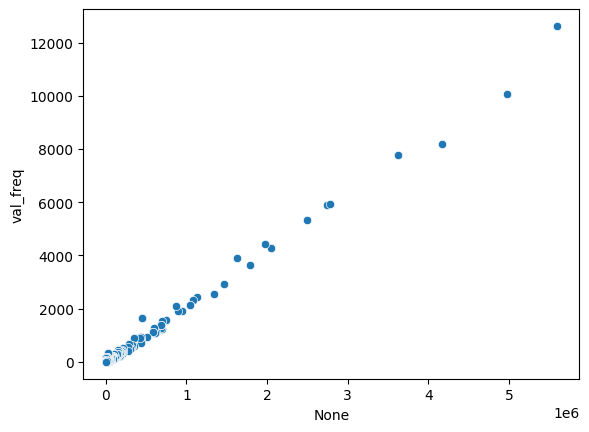

In [15]:
# Visualize train and validation proportions of tokens
'''
There appears to be a strong linear relationship between train and test occurrence of tokens.
This suggests that the training distribution is relatively close to the test distribution. 
'''
sns.scatterplot(x=train_freqs, y=loss_stats['base']['val_freq'])

<Axes: xlabel='None', ylabel='avg_loss'>

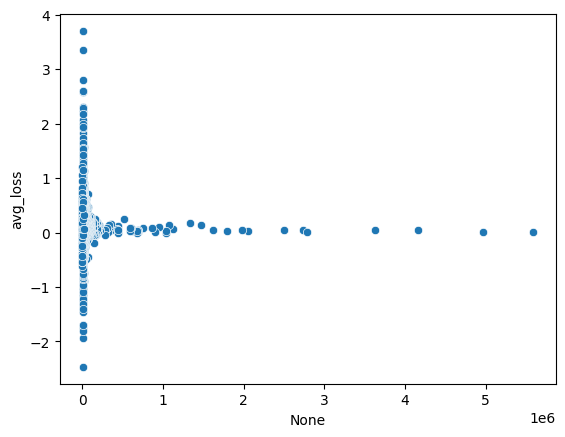

In [16]:
# Visualize base vs. other models' losses vs train frequency
'''
Here, I plot the loss difference of a token between the two models. As such, a higher y-value
corresponds to the base model being worse at predicting that token. The models are equally 
good at predicting frequent tokens, but there are tradeoffs for infrequent ones. Sometimes base is
worse, sometimes it is better. 
'''
loss_diff = loss_stats['base']['avg_loss'] - loss_stats['euc']['avg_loss']
sns.scatterplot(x=train_freqs, y=loss_diff)

0.16416979531277537
0.143440543831169


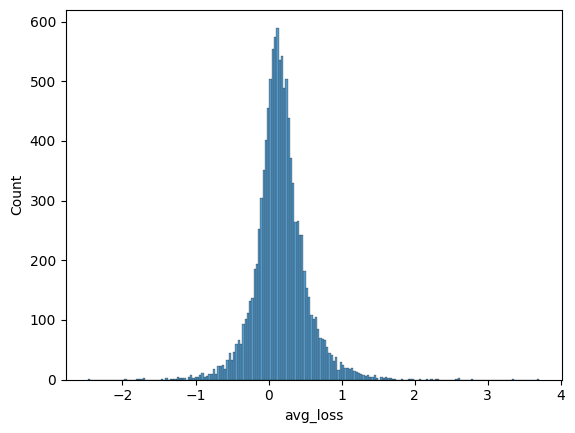

In [19]:
# Visualize histogram of loss_diff to get a sense for its distribution
'''
Loss_diff seems to be centered at a value slightly greater than 0. Printing the mean/median
confirms that loss_diff is slightly positive. This means that there are more tokens for which
the base model is worse than a Euclidean distance model. This is expected, as the euc model
achieved a lower overall minimum on its loss curve. 
'''
sns.histplot(x=loss_diff)
print(loss_diff.mean())
print(loss_diff.median())

### `n_heads_16`

In [52]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_16')
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

<Axes: xlabel='None', ylabel='avg_loss'>

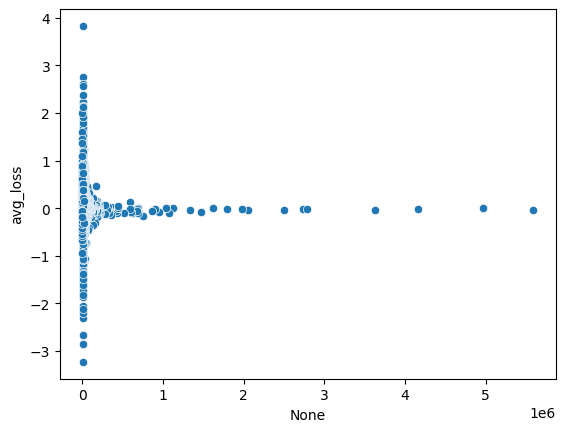

In [53]:
# Visualize base vs. other models' losses vs train frequency
'''
Here, I plot the loss difference of a token between the two models. As such, a higher y-value
corresponds to the base model being worse at predicting that token. The models are equally 
good at predicting frequent tokens, but there are tradeoffs for infrequent ones. Sometimes base is
worse, sometimes it is better. 
'''
loss_diff = loss_stats['euc']['avg_loss'] - loss_stats['man']['avg_loss']
sns.scatterplot(x=train_freqs, y=loss_diff)

0.13222120681214097
0.1015625


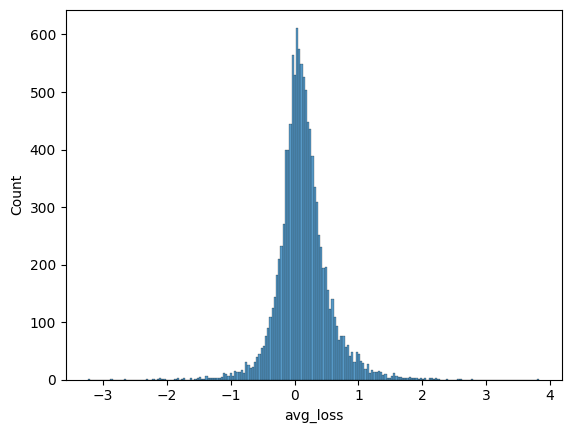

In [54]:
# Visualize histogram of loss_diff to get a sense for its distribution
'''
Loss_diff seems to be centered at a value slightly greater than 0. Printing the mean/median
confirms that loss_diff is slightly positive. This means that there are more tokens for which
the base model is worse than a Euclidean distance model. This is expected, as the euc model
achieved a lower overall minimum on its loss curve. 

Compared to `n_heads_32`, this histogram is even more off-center. This suggests that there is 
a greater difference between the two models' prediction accuracies as we increase the head
dimension. 

NOTE: When replacing 'euc' with 'man' for this group of models, the loss_diff column is even
more off-center. This again lines up with how 'man' achieved lower loss than 'euc' when heads had
a dimensionality of 4. 
'''
sns.histplot(x=loss_diff)
print(loss_diff.mean())
print(loss_diff.median())

### `n_heads_8`

In [34]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_8')
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

<Axes: xlabel='None', ylabel='avg_loss'>

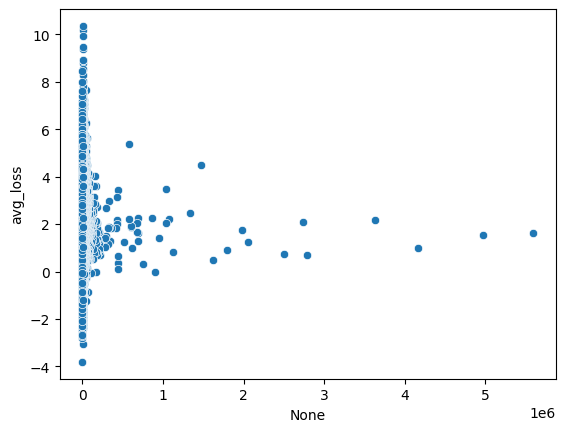

In [48]:
# Visualize base vs. other models' losses vs train frequency
'''
Here, I plot the loss difference of a token between the two models. As such, a higher y-value
corresponds to the base model being worse at predicting that token. The models are equally 
good at predicting frequent tokens, but there are tradeoffs for infrequent ones. Sometimes base is
worse, sometimes it is better. 
'''
loss_diff = loss_stats['euc-positional']['avg_loss'] - loss_stats['man-positional']['avg_loss']
sns.scatterplot(x=train_freqs, y=loss_diff)

1.528855883879666
1.322423135080645


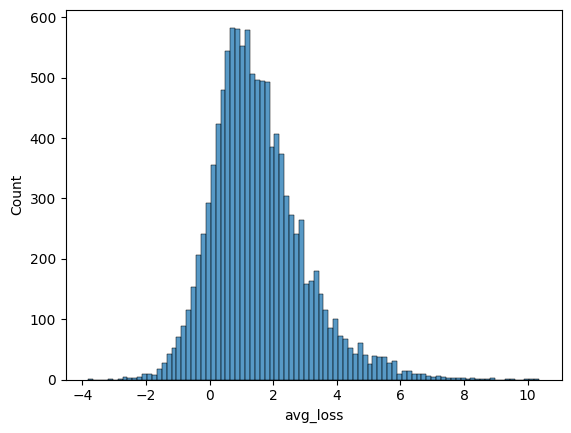

In [49]:
# Visualize histogram of loss_diff to get a sense for its distribution
'''
Loss_diff seems to be centered at a value slightly greater than 0. Printing the mean/median
confirms that loss_diff is slightly positive. This means that there are more tokens for which
the base model is worse than a Euclidean distance model. This is expected, as the euc model
achieved a lower overall minimum on its loss curve. 

Compared to `n_heads_32` or `n_heads_16`, this histogram is even more off-center. This suggests that there is 
a greater difference between the two models' prediction accuracies as we increase the head
dimension. Furthermore, there is an even greater difference between `euc-positional` and `man-positional`.

Here are the (mean, median) pairs when loss_diff is as follows:
* `base` - `euc-positional` --> (0.194, 0.240)
* `base` - `man-positional` --> (1.723, 1.651)
* `euc-positional` - `man-positional` --> (1.529, 1.322)

This is extremely interesting given that the `euc-positional` and `man-positional` models had extremely
similar (nearly overlapping) training curves. I wonder what the difference between `base` and
`base-positional` would be given that they also had the same training curve. Regardless, it appears as though
for the majority of tokens, Manhattan distance outperforms Euclidean distance. The difference in quality
is even greater as the number of heads decreases from 16 to 8. More investigation should be done to examine
why there is such a difference given the identical loss curve. 
'''
sns.histplot(x=loss_diff)
print(loss_diff.mean())
print(loss_diff.median())

# Hull Statistics

## `n_heads_32`

In [2]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_32')
hull_stats = {}

for path in EXPERIMENT_DIR.glob('*/hull-stats.csv'):
    hull_stats[path.parts[-2]] = pd.read_csv(path)

In [46]:
hull_stats['euc']['layer_4_k_count'].isna().sum()

15857

In [41]:
loss_stats['base']['val_freq'].isna().sum()

4726